In [1]:
import os

os.environ["PIP_CACHE_DIR"] = "/cs/student/projects1/aibh/2024/rmaheswa/cache"
os.environ["HF_HOME"] = "/cs/student/projects1/aibh/2024/rmaheswa/cache/huggingface"
os.environ["TRANSFORMERS_CACHE"] = "/cs/student/projects1/aibh/2024/rmaheswa/cache/transformers"
os.environ['MPLCONFIGDIR'] = '/cs/student/projects1/aibh/2024/rmaheswa/cache/matplotlib'


In [2]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# from datasets import load_from_disk
# import torch.nn as nn, torch.nn.functional as F
# import torch, json
# from transformers import BertTokenizer, BertModel
# from utils import BertModel as MedBertModel
# from utils import LangCellDataCollatorForCellClassification as DataCollatorForCellClassification
# from tqdm import tqdm
# from torch.utils.data import DataLoader

# class Pooler(nn.Module):
#     def __init__(self, config, pretrained_proj, proj_dim):
#         super().__init__()
#         self.proj = nn.Linear(config.hidden_size, proj_dim)
#         self.proj.load_state_dict(torch.load(pretrained_proj))
#     def forward(self, hidden_states: torch.Tensor) -> torch.Tensor:
#         pooled_output = hidden_states[:, 0]
#         pooled_output = F.normalize(self.proj(pooled_output), dim=-1)
#         return pooled_output
    
# model = BertModel.from_pretrained('LangCell/ckpt/cell_bert')
# model.pooler = Pooler(model.config, pretrained_proj='LangCell/ckpt/cell_proj.bin', proj_dim=256)
# proj = model.pooler.proj
# # model = model.module
# model = model.to("cuda")

# text_pretrained_model = 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext'
# tokenizer = BertTokenizer.from_pretrained(text_pretrained_model)
# tokenizer.add_special_tokens({'bos_token':'[DEC]'})
# tokenizer.add_special_tokens({'additional_special_tokens':['[ENC]']})       
# tokenizer.enc_token_id = tokenizer.additional_special_tokens_ids[0]  
# text_encoder = MedBertModel.from_pretrained('LangCell/ckpt/text_bert', add_pooling_layer=True)
# text_encoder.pooler = Pooler(text_encoder.config, pretrained_proj='LangCell/ckpt/text_proj.bin', proj_dim=256)
# text_encoder = text_encoder.to("cuda")

# ctm_head = nn.Linear(text_encoder.config.hidden_size, 2)
# ctm_head.load_state_dict(torch.load('LangCell/ckpt/ctm_head.bin'))
# ctm_head = ctm_head.to("cuda")

In [3]:
# import anndata as ad
# adata = ad.read_h5ad("/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/data/pancreas_cancer_with_celltypes.h5ad")

# print(adata.obs.columns)

# print(adata.obs.head())

In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from datasets import load_from_disk
import torch.nn as nn, torch.nn.functional as F
import torch, json
from transformers import BertTokenizer, BertModel
from utils import BertModel as MedBertModel
from utils import LangCellDataCollatorForCellClassification as DataCollatorForCellClassification
from tqdm import tqdm
from torch.utils.data import DataLoader

# Use environment cache dirs if needed
os.environ["PIP_CACHE_DIR"] = "/cs/student/projects1/aibh/2024/rmaheswa/cache"
os.environ["HF_HOME"] = "/cs/student/projects1/aibh/2024/rmaheswa/cache/huggingface"
os.environ["TRANSFORMERS_CACHE"] = "/cs/student/projects1/aibh/2024/rmaheswa/cache/transformers"

class Pooler(nn.Module):
    def __init__(self, config, pretrained_proj, proj_dim):
        super().__init__()
        self.proj = nn.Linear(config.hidden_size, proj_dim)
        self.proj.load_state_dict(torch.load(pretrained_proj))
    def forward(self, hidden_states: torch.Tensor) -> torch.Tensor:
        pooled_output = hidden_states[:, 0]
        pooled_output = F.normalize(self.proj(pooled_output), dim=-1)
        return pooled_output

# Paths
base_path = '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/ckpt'

# Cell model
model = BertModel.from_pretrained(
    f'{base_path}/cell_bert',
    local_files_only=True
)
model.pooler = Pooler(model.config, pretrained_proj=f'{base_path}/cell_proj.bin', proj_dim=256)
proj = model.pooler.proj
model = model.to("cuda")

# Text encoder
text_pretrained_model = 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext'
tokenizer = BertTokenizer.from_pretrained(text_pretrained_model)
tokenizer.add_special_tokens({'bos_token': '[DEC]'})
tokenizer.add_special_tokens({'additional_special_tokens': ['[ENC]']})
tokenizer.enc_token_id = tokenizer.additional_special_tokens_ids[0]

text_encoder = MedBertModel.from_pretrained(
    f'{base_path}/text_bert',
    local_files_only=True,
    add_pooling_layer=True
)
text_encoder.pooler = Pooler(text_encoder.config, pretrained_proj=f'{base_path}/text_proj.bin', proj_dim=256)
text_encoder = text_encoder.to("cuda")

# Cell-type matching head
ctm_head = nn.Linear(text_encoder.config.hidden_size, 2)
ctm_head.load_state_dict(torch.load(f'{base_path}/ctm_head.bin'))
ctm_head = ctm_head.to("cuda")


/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/venv/lib/python3.13/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at /cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/ckpt/cell_bert and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
def text_encode(text):
    text = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt').to('cuda')
    text = text_encoder(**text).pooler_output
    # text = F.normalize(model.text_projector(text))
    return text

def cell_encode(cell_input_ids, cell_atts):
    cell = model(cell_input_ids.to("cuda"), cell_atts.to("cuda"))
    cell_last_h = cell.last_hidden_state
    cell_pooler = cell.pooler_output
    return cell_last_h, cell_pooler

def ctm(text, cell_emb, cell_atts):
    text = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt').to('cuda')
    output = text_encoder(**text,
                encoder_hidden_states = cell_emb.to("cuda"),
                encoder_attention_mask = cell_atts.to("cuda"),
                return_dict = True,
                mode = 'multimodal',
                )
    logits = ctm_head(output.last_hidden_state[:, 0, :])
    logits = F.softmax(logits, dim=-1)[..., 1] # [n]
    return logits

In [6]:
from datasets import load_from_disk

In [7]:
dataset = load_from_disk("/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/your_data/tokenized_dataset_pancreas_binary_20250806_014412")

dataset_sub = dataset.shuffle(seed=42)  # optionally add .select(range(1000)) for debugging
for label_name in ["celltype", "cell_type", "str_labels", "labels"]:
    if label_name in dataset_sub.column_names:
        break
if label_name != "celltype":
    dataset_sub = dataset_sub.rename_column(label_name, "celltype")

print(set(dataset_sub["celltype"]))

# Inspect your tokenized data
print("Columns:", dataset_sub.column_names)
print("\nFirst example:")
ex = dataset_sub[0]
for k, v in ex.items():
    t = type(v)
    length = len(v) if isinstance(v, (list, tuple)) else "–"
    preview = v[:10] if isinstance(v, (list, tuple)) else v
    print(f"  {k}: {t.__name__}, length={length}, preview={preview}")


{'Mast', 'B_cell', 'Pericyte', 'NK_cell', 'Neuron', 'Endocrine', 'Myocyte', 'Epithelial', 'Schwann', 'Malignant', 'Adipocyte', 'Endothelial', 'Neutrophil', 'Fibroblast', 'Macrophage', 'T_cell', 'Plasma', 'Dendritic'}
Columns: ['input_ids', 'group', 'sample_id', 'sample', 'celltype', 'cell_subtype', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'disease', 'source', 'total_counts', 'n_genes_by_counts', 'binary_label', 'length']

First example:
  input_ids: list, length=939, preview=[5560, 24400, 5449, 17689, 11740, 11965, 15565, 3177, 14664, 6536]
  group: str, length=–, preview=Group1
  sample_id: str, length=–, preview=Group1
  sample: str, length=–, preview=T22
  celltype: str, length=–, preview=Endocrine
  cell_subtype: str, length=–, preview=Alpha
  complexity: int, length=–, preview=987
  umap1: str, length=–, preview=nan
  umap2: str, length=–, preview=nan
  g1s_score: str, length=–, preview=nan
  g2m_score

In [8]:
print(set(dataset_sub['celltype']))

{'Mast', 'B_cell', 'Pericyte', 'NK_cell', 'Neuron', 'Endocrine', 'Myocyte', 'Epithelial', 'Schwann', 'Malignant', 'Adipocyte', 'Endothelial', 'Neutrophil', 'Fibroblast', 'Macrophage', 'T_cell', 'Plasma', 'Dendritic'}


In [9]:
# Create binary labels for binary classification
def create_binary_labels(example):
    if 'binary_label' in example:
        return example
    else:
        if example.get('cell_type') == 'Malignant':
            example['binary_label'] = 1
        else:
            example['binary_label'] = 0
        return example

# Apply binary labeling
dataset_sub = dataset_sub.map(create_binary_labels, num_proc=16)

# Load binary classification descriptions
import json
binary_type2text = json.load(open("/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/your_data/binary_type2text_pancreas.json"))
binary_types = ['Non-malignant', 'Malignant']

print("Binary classification setup:")
print(f"Binary types: {binary_types}")
print(f"Binary descriptions: {binary_type2text}")

Binary classification setup:
Binary types: ['Non-malignant', 'Malignant']
Binary descriptions: {'Malignant': 'Malignant epithelial cells from pancreas cancer, showing abnormal proliferation and cancer-specific gene expression patterns', 'Non-malignant': 'Non-malignant cells including normal epithelial, immune cells, stromal cells, and other non-cancerous cell types in pancreas tissue'}


In [10]:
import json
# Use binary classification descriptions
binary_type2text = json.load(open("/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/your_data/binary_type2text_pancreas.json"))
binary_types = ['Non-malignant', 'Malignant']
texts = [binary_type2text[typename] for typename in binary_types]

with torch.no_grad():
    text_embs = torch.cat([text_encode(text) for text in texts], 0).T.cuda() # 256 * N
text_embs.requires_grad = False
type2num = dict([(type, i) for i, type in enumerate(binary_types)])

In [11]:
# def classes_to_ids(example):
#     example["label"] = type2num[example["celltype"]]
#     return example
# testdataset = dataset_sub.map(classes_to_ids, num_proc=16)
# remove_columns = testdataset.column_names
# remove_columns.remove('input_ids')
# remove_columns.remove('label')
# testdataset = testdataset.remove_columns(remove_columns)
# batchsize = 48
# collator = DataCollatorForCellClassification()
# dataloader = DataLoader(testdataset, batch_size=batchsize, collate_fn=collator, shuffle=False)

In [12]:
from torch.utils.data import DataLoader

# 1) Map cell‐type strings → numeric labels
def classes_to_ids(example):
    example["label"] = type2num['Non-malignant' if example["binary_label"] == 0 else 'Malignant']
    return example
testdataset = dataset_sub.map(classes_to_ids, num_proc=16)

# 2) Keep only the fields the model & collator need:
keep_cols = ["input_ids", "attention_mask", "label"]
drop_cols = [c for c in testdataset.column_names if c not in keep_cols]
testdataset = testdataset.remove_columns(drop_cols)

# 3) Build DataLoader with the classification collator
batchsize = 160
collator  = DataCollatorForCellClassification()

dataloader = DataLoader(
    testdataset,
    batch_size=batchsize,
    shuffle=False,
    collate_fn=collator,
    num_workers=4,
    pin_memory=True
)

# 4) Sanity‐check your batch shapes:
batch = next(iter(dataloader))
print(batch.keys())                      # should include 'input_ids','attention_mask','labels'
print(batch['input_ids'].shape)          # e.g. [48, L] with L >> 1
print(batch['attention_mask'].shape)     # same shape as input_ids
print(batch['labels'].shape)             # [48]


/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/geneformer_001/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/geneformer_001/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/geneformer_001/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

dict_keys(['input_ids', 'attention_mask', 'labels'])
torch.Size([160, 2048])
torch.Size([160, 2048])
torch.Size([160])


In [13]:
import torch
import torch.nn.functional as F
from tqdm import tqdm

# Assumed already defined above:
#   model           – your cell encoder on GPU
#   text_encoder    – your text encoder on GPU
#   ctm_head        – your CTM head on GPU
#   tokenizer       – your text tokenizer
#   dataloader      – DataLoader over your tokenized cells
#   text_embs       – a (proj_dim × n_texts) tensor on GPU
#   texts           – list of length n_texts of description strings
#   batchsize       – batch size used in the dataloader
#   dataset_sub     – your HuggingFace Dataset (for sized-based prealloc)
#   testdataset     – same dataset but with a “label” field if you set it earlier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Pre-allocate result tensors on GPU
N = len(dataset_sub)
C = text_embs.shape[-1]
cell_embs  = torch.zeros(N, 256, device=device)
preds      = torch.zeros(N,        device=device, dtype=torch.long)
sim_logits = torch.zeros(N,    C,  device=device)
ctm_logits = torch.zeros(N,    C,  device=device)
logits     = torch.zeros(N,    C,  device=device)
labels     = torch.tensor(testdataset['label'], device=device, dtype=torch.long)

model.eval()
text_encoder.eval()
ctm_head.eval()

with torch.no_grad():
    for batch_idx, batch in tqdm(enumerate(dataloader), total=len(dataloader)):
        # Move inputs to GPU
        input_ids      = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        # 2) Encode cells
        cell_last_h, cellemb = cell_encode(input_ids, attention_mask)
        #    cell_last_h: (B, L, H); cellemb: (B, 256)

        # 3) Similarity branch
        sim = (cellemb @ text_embs) / 0.05           # (B, C)
        sim_log = F.softmax(sim, dim=-1)             # (B, C)

        # 4) CTM branch
        B = sim_log.size(0)
        ctm_log = torch.zeros_like(sim_log, device=device)
        for t_idx, txt in enumerate(texts):
            text_list = [txt] * B
            ctm_log[:, t_idx] = ctm(text_list, cell_last_h, attention_mask)
        ctm_log = F.softmax(ctm_log, dim=-1)

        # 5) Combine and predict
        logit = (sim_log + ctm_log) / 2              # (B, C)
        pred  = logit.argmax(dim=-1)                 # (B,)

        # 6) Store results
        start = batch_idx * batchsize
        end   = start + B

        sim_logits[start:end] = sim_log
        ctm_logits[start:end] = ctm_log
        logits[start:end]     = logit
        cell_embs[start:end]  = cellemb
        preds[start:end]      = pred

# 7) Move everything back to CPU for saving
cell_embs_cpu  = cell_embs.cpu()
sim_logits_cpu = sim_logits.cpu()
ctm_logits_cpu = ctm_logits.cpu()
logits_cpu     = logits.cpu()
preds_cpu      = preds.cpu()
labels_cpu     = labels.cpu()

# 8) Save to disk
torch.save({
    'cell_embs':  cell_embs_cpu,
    'sim_logits': sim_logits_cpu,
    'ctm_logits': ctm_logits_cpu,
    'logits':     logits_cpu,
    'preds':      preds_cpu,
    'labels':     labels_cpu
}, '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/your_data/results_pancreas_binary.pt')

  0%|          | 0/1407 [00:00<?, ?it/s]/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/geneformer_001/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/geneformer_001/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/geneformer_001/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a ten

In [14]:

# # %%
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score
# import numpy as np
# sim_preds = sim_logits.argmax(dim=-1)
# ctm_preds = ctm_logits.argmax(dim=-1)
# alpha = 0.1
# preds = (alpha * sim_logits + (1 - alpha) * ctm_logits).argmax(dim=-1)
# labels = torch.tensor(testdataset['label'])
# for row in confusion_matrix(labels, preds):
#     print('\t'.join([str(x) for x in row]))
# print(classification_report(labels, preds, digits=4))

In [15]:
# %%
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score
import torch

# Compute predictions if you haven't already:
alpha = 0.1
preds = (alpha * sim_logits + (1 - alpha) * ctm_logits).argmax(dim=-1)

# Move to CPU and convert to NumPy
labels_np = torch.tensor(testdataset['label']).cpu().numpy()
preds_np  = preds.cpu().numpy()

# Now you can safely call sklearn metrics:
cm = confusion_matrix(labels_np, preds_np)
for row in cm:
    print('\t'.join(map(str, row)))

print(classification_report(labels_np, preds_np, digits=4))

# (Optional) If you want ROC AUC / AP scores:
# scores_np = (alpha * sim_logits + (1 - alpha) * ctm_logits).cpu().numpy()
# from sklearn.preprocessing import label_binarize
# n_classes = scores_np.shape[1]
# labels_onehot = label_binarize(labels_np, classes=list(range(n_classes)))
# print("ROC AUC:", roc_auc_score(labels_onehot, scores_np, average="macro", multi_class="ovr"))
# print("Avg Precision:", average_precision_score(labels_onehot, scores_np, average="macro"))


110806	49644
3921	60617
              precision    recall  f1-score   support

           0     0.9658    0.6906    0.8053    160450
           1     0.5498    0.9392    0.6936     64538

    accuracy                         0.7619    224988
   macro avg     0.7578    0.8149    0.7495    224988
weighted avg     0.8465    0.7619    0.7733    224988



In [16]:
import numpy as np

In [19]:
# 5) Binary Classification Metrics (Fixed)
scores_np = (alpha * sim_logits + (1 - alpha) * ctm_logits).cpu().numpy()
print("\n" + "="*50)
print("BINARY CLASSIFICATION METRICS")
print("="*50)

# For binary classification, we only need the positive class scores (class 1 = Malignant)
positive_class_scores = scores_np[:, 1]  # Malignant class scores
labels_binary = labels_np  # Already binary (0=non-malignant, 1=malignant)

# Compute ROC AUC and Average Precision for binary classification
roc_auc_binary = roc_auc_score(labels_binary, positive_class_scores)
ap_score_binary = average_precision_score(labels_binary, positive_class_scores)

print(f"Binary Classification Results:")
print(f"ROC AUC: {roc_auc_binary:.4f}")
print(f"Average Precision: {ap_score_binary:.4f}")

# For multi-class comparison, we need to handle it differently
# Since we have 2 classes, we can compute per-class metrics manually
# The issue is that label_binarize with 2 classes creates only 1 column
# So we need to create the one-hot encoding manually
labels_onehot = np.zeros((len(labels_binary), 2))
labels_onehot[:, 0] = (labels_binary == 0).astype(int)  # Non-malignant
labels_onehot[:, 1] = (labels_binary == 1).astype(int)  # Malignant

# Compute per-class ROC AUC
roc_auc_class0 = roc_auc_score(labels_onehot[:, 0], scores_np[:, 0])
roc_auc_class1 = roc_auc_score(labels_onehot[:, 1], scores_np[:, 1])
roc_auc_macro = (roc_auc_class0 + roc_auc_class1) / 2

# Compute per-class AP
ap_class0 = average_precision_score(labels_onehot[:, 0], scores_np[:, 0])
ap_class1 = average_precision_score(labels_onehot[:, 1], scores_np[:, 1])
ap_score_macro = (ap_class0 + ap_class1) / 2

print(f"\nMulti-class Results (for reference):")
print(f"Macro ROC AUC: {roc_auc_macro:.4f}")
print(f"Macro Average Precision: {ap_score_macro:.4f}")

# Confusion matrix for binary classification
from sklearn.metrics import confusion_matrix
binary_preds = (positive_class_scores > 0.5).astype(int)
cm_binary = confusion_matrix(labels_binary, binary_preds)
print(f"\nBinary Confusion Matrix:")
print(f"True Negatives (Non-malignant): {cm_binary[0,0]}")
print(f"False Positives: {cm_binary[0,1]}")
print(f"False Negatives: {cm_binary[1,0]}")
print(f"True Positives (Malignant): {cm_binary[1,1]}")

# Calculate binary classification metrics
tn, fp, fn, tp = cm_binary.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nBinary Classification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("="*50)


BINARY CLASSIFICATION METRICS
Binary Classification Results:
ROC AUC: 0.8627
Average Precision: 0.5958

Multi-class Results (for reference):
Macro ROC AUC: 0.8627
Macro Average Precision: 0.7722

Binary Confusion Matrix:
True Negatives (Non-malignant): 110806
False Positives: 49644
False Negatives: 3921
True Positives (Malignant): 60617

Binary Classification Metrics:
Precision: 0.5498
Recall: 0.9392
F1-Score: 0.6936


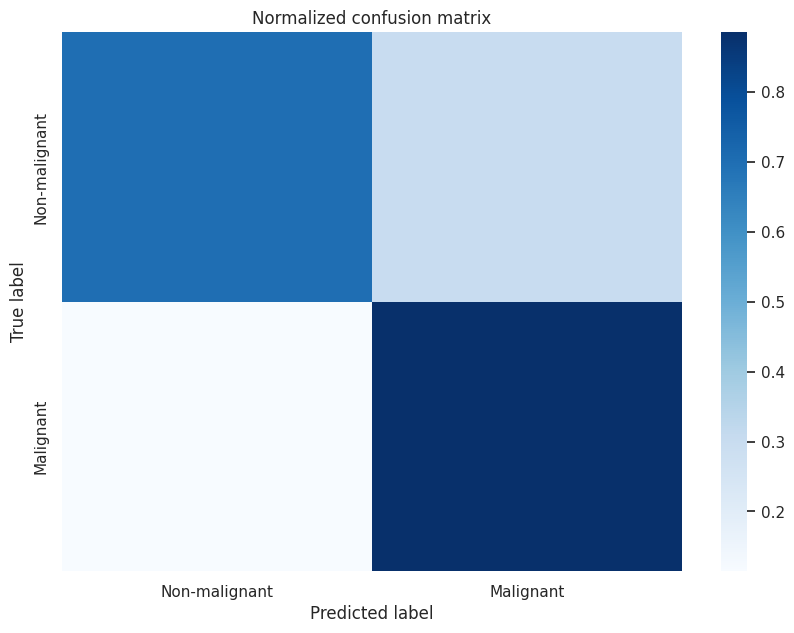

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import torch

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=False, cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load the saved results
results = torch.load('/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/your_data/results_pancreas_binary.pt')
labels = results['labels']
preds = results['preds']
labels_cpu = labels.cpu().numpy() if hasattr(labels, 'cpu') else np.array(labels)
preds_cpu = preds.cpu().numpy() if hasattr(preds, 'cpu') else np.array(preds)

# Ensure types matches the number of classes in the confusion matrix
num_classes = max(labels_cpu.max(), preds_cpu.max()) + 1
types = ['Non-malignant', 'Malignant']

plot_confusion_matrix(labels_cpu, preds_cpu, types, normalize=True)

In [21]:
import anndata as ad, scanpy as sc
cell_embs = results['cell_embs']
cell_embs_ad = ad.AnnData(cell_embs.numpy())
cell_embs_ad.obs['celltype'] = dataset_sub['celltype']
if 'batch' in dataset_sub.features.keys():
    cell_embs_ad.obs['batch'] = dataset_sub['batch']
    cell_embs_ad.obs['batch'] = cell_embs_ad.obs['batch'].astype(str)
cell_embs_ad.obs['predictions'] = [types[i] for i in preds]
sc.pp.neighbors(cell_embs_ad, use_rep='X', n_neighbors=80)


In [22]:
sc.tl.umap(cell_embs_ad)

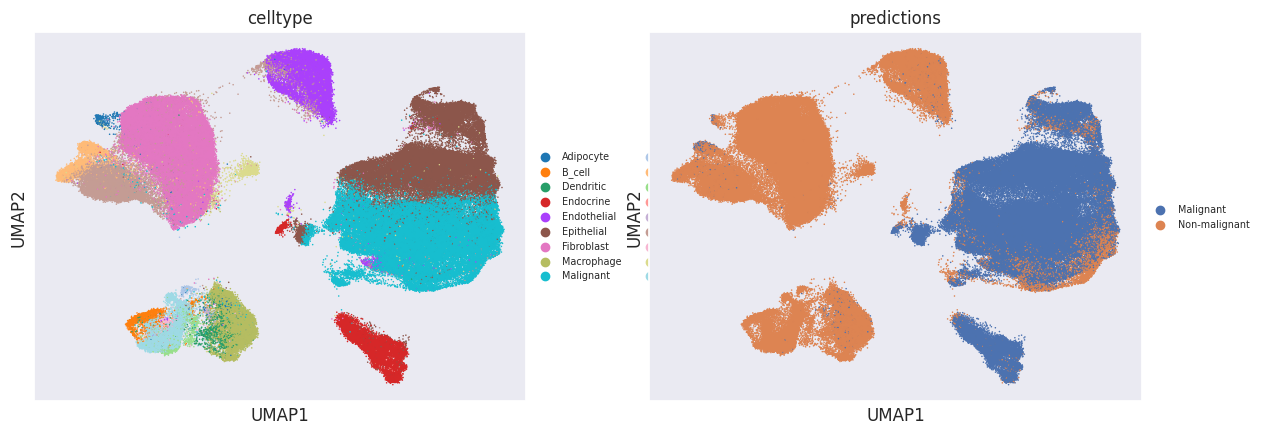

In [23]:
# List of columns you want to color by
color_keys = ['celltype', 'predictions', 'batch']

# Only keep those that exist in .obs
existing_keys = [k for k in color_keys if k in cell_embs_ad.obs.columns]

sc.pl.umap(cell_embs_ad, color=existing_keys, legend_fontsize='xx-small', size=5, legend_fontweight='light')

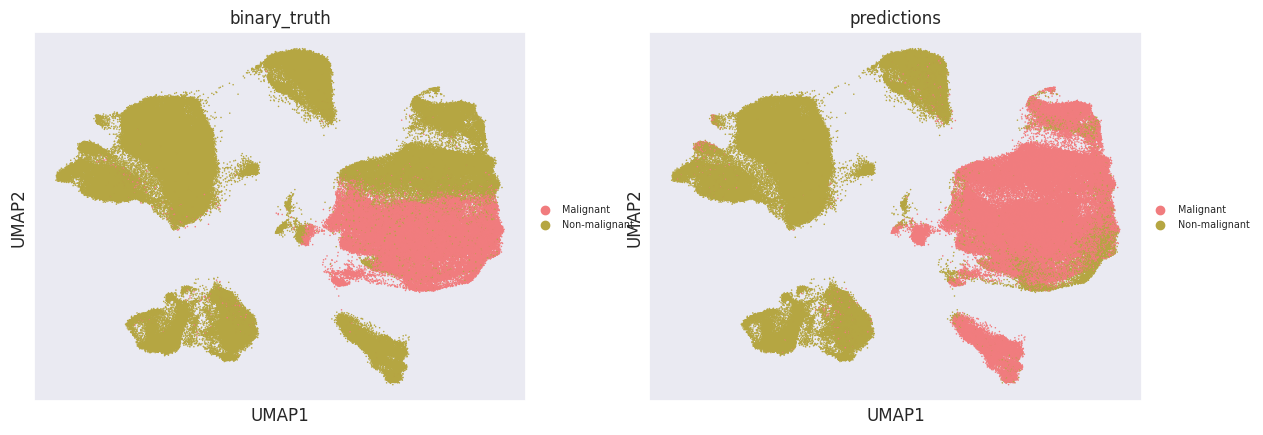

In [24]:
# Add this after cell_embs_ad.obs['predictions'] = [types[i] for i in preds]

# 1. Create a binary ground truth column (Malignant/Non-malignant)
cell_embs_ad.obs['binary_truth'] = ['Malignant' if x == 1 else 'Non-malignant' for x in dataset_sub['binary_label']]

# 2. Plot UMAP side-by-side: binary truth vs binary predictions
# Define a consistent color palette for both classes
# Example: pink for Malignant, ochre for Non-malignant (as in your plot)
custom_palette = {
    "Malignant": "#f17c7e",      # pink
    "Non-malignant": "#b5a642"   # ochre/gold
}

# Plot UMAP with consistent colors
sc.pl.umap(
    cell_embs_ad,
    color=['binary_truth', 'predictions'],
    legend_fontsize='xx-small',
    size=5,
    legend_fontweight='light',
    palette=[custom_palette[k] for k in ['Malignant', 'Non-malignant']]
)

Loading results...
Dataset: 224988 samples, 2 classes
Classes: ['Malignant', 'Non-malignant']

Generating ROC curves...


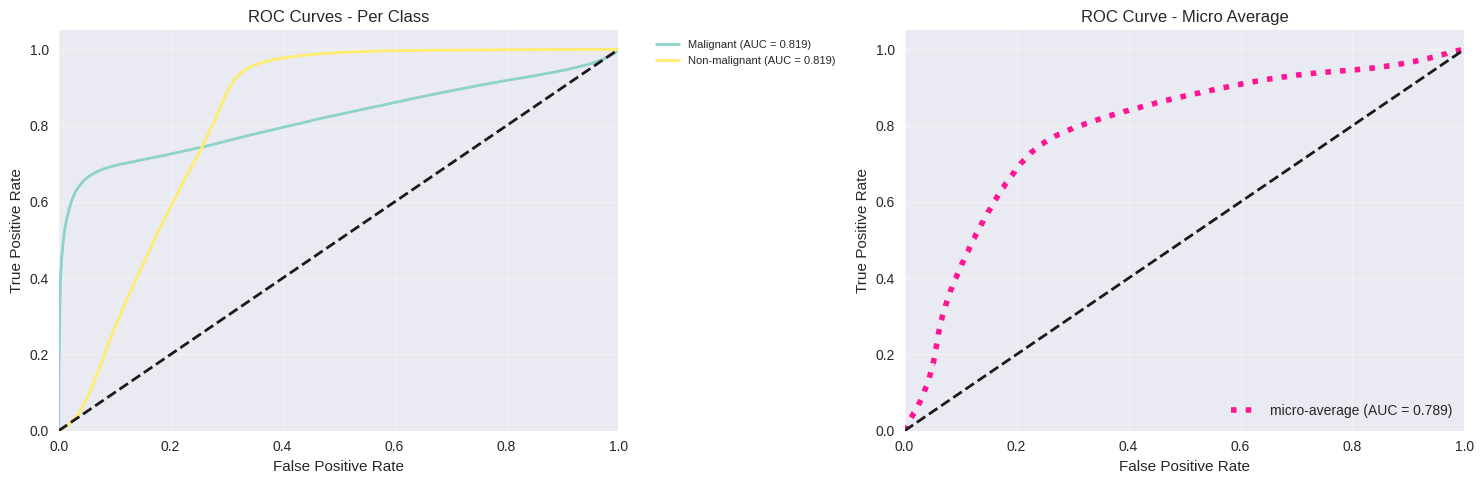

Generating Precision-Recall curves...


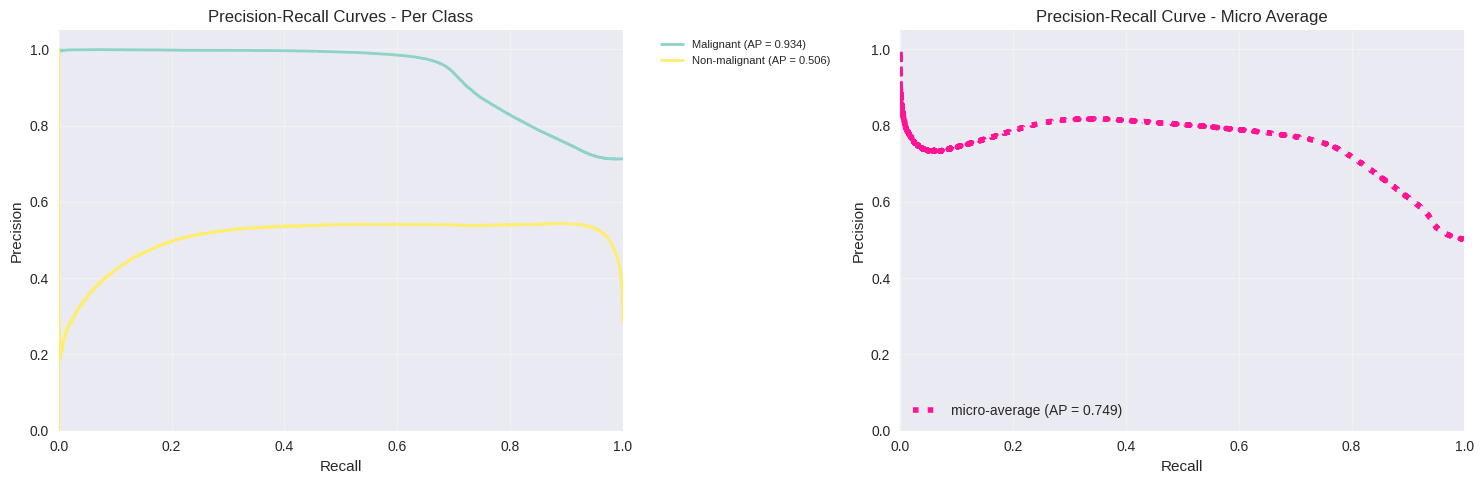

Generating performance summary...


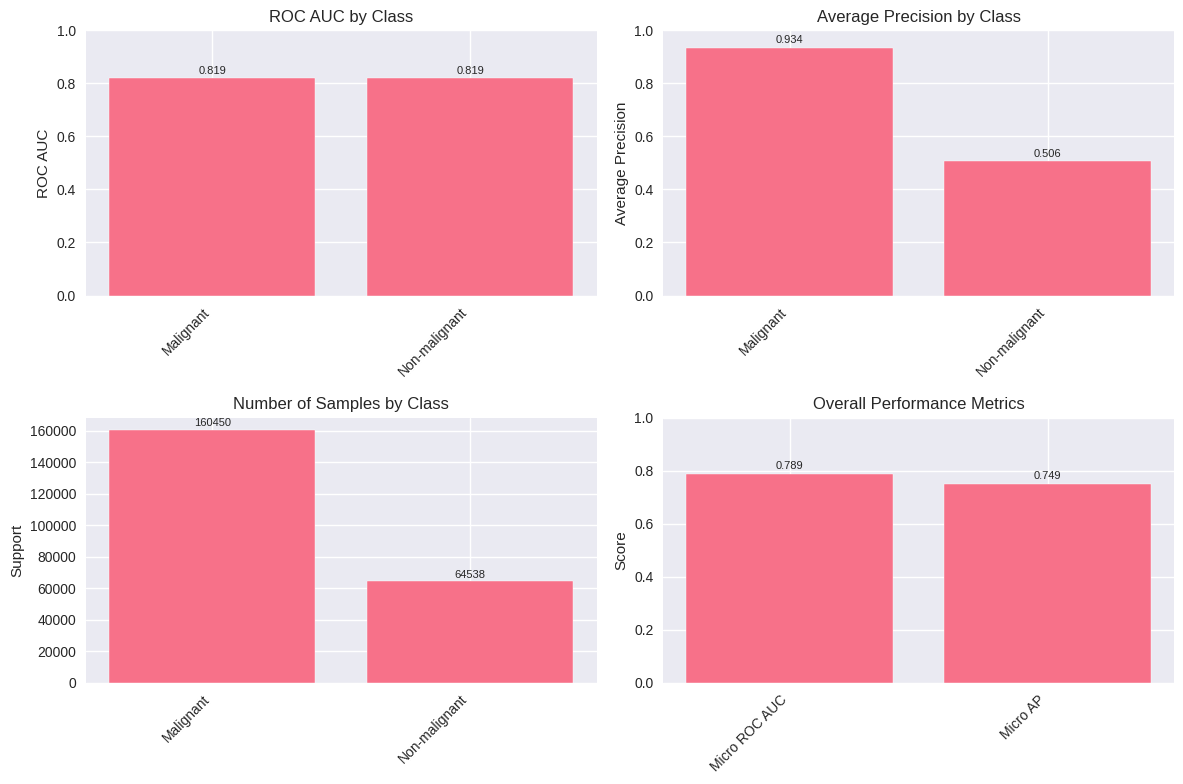


PERFORMANCE SUMMARY
Micro ROC AUC: 0.7888
Micro Average Precision: 0.7491

Per-class metrics:
  Malignant: ROC AUC = 0.8193, AP = 0.9340
  Non-malignant: ROC AUC = 0.8193, AP = 0.5061


In [25]:
# Roc and PR curves
# =============================================================================
# ROC AND PRECISION-RECALL CURVES FOR LANGCELL RESULTS
# =============================================================================
# Copy and paste this cell into your Jupyter notebook after your results are ready

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, precision_recall_curve, auc,
    roc_auc_score, average_precision_score
)
from sklearn.preprocessing import label_binarize
import json

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def load_results(results_path, type2text_path=None):
    """Load results and cell type information."""
    # Load results
    results = torch.load(results_path, map_location='cpu')
    labels = results['labels'].numpy()
    preds = results['preds'].numpy()
    
    # Load cell type information if available
    cell_types = None
    if type2text_path:
        try:
            with open(type2text_path, 'r') as f:
                type2text = json.load(f)
            cell_types = list(type2text.keys())
        except:
            print("Warning: Could not load type2text file")
    
    # If no cell types provided, use numeric labels
    if cell_types is None:
        n_classes = max(labels.max(), preds.max()) + 1
        cell_types = [f"Class_{i}" for i in range(n_classes)]
    
    # Get prediction scores
    if 'logits' in results:
        scores = results['logits'].numpy()
    elif 'sim_logits' in results and 'ctm_logits' in results:
        # Combine similarity and CTM logits
        alpha = 0.1
        sim_logits = results['sim_logits'].numpy()
        ctm_logits = results['ctm_logits'].numpy()
        scores = alpha * sim_logits + (1 - alpha) * ctm_logits
    else:
        raise ValueError("No prediction scores found in results")
    
    return labels, preds, scores, cell_types

def plot_roc_curves(labels, scores, cell_types, figsize=(15, 5)):
    """Plot ROC curves for all classes."""
    n_classes = len(cell_types)
    
    # Binarize labels
    labels_bin = label_binarize(labels, classes=range(n_classes))
    if n_classes == 2:
        labels_bin = np.hstack([1 - labels_bin, labels_bin])
    
    # Compute ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(labels_bin[:, i], scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC
    fpr["micro"], tpr["micro"], _ = roc_curve(labels_bin.ravel(), scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Individual classes
    colors = plt.cm.Set3(np.linspace(0, 1, n_classes))
    for i, color in zip(range(n_classes), colors):
        ax1.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'{cell_types[i]} (AUC = {roc_auc[i]:.3f})')
    
    ax1.plot([0, 1], [0, 1], 'k--', lw=2)
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curves - Per Class')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax1.grid(True, alpha=0.3)
    
    # Micro average
    ax2.plot(fpr["micro"], tpr["micro"],
            label=f'micro-average (AUC = {roc_auc["micro"]:.3f})',
            color='deeppink', linestyle=':', linewidth=4)
    ax2.plot([0, 1], [0, 1], 'k--', lw=2)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve - Micro Average')
    ax2.legend(loc="lower right")
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return roc_auc

def plot_pr_curves(labels, scores, cell_types, figsize=(15, 5)):
    """Plot Precision-Recall curves for all classes."""
    n_classes = len(cell_types)
    
    # Binarize labels
    labels_bin = label_binarize(labels, classes=range(n_classes))
    if n_classes == 2:
        labels_bin = np.hstack([1 - labels_bin, labels_bin])
    
    # Compute PR curves
    precision = dict()
    recall = dict()
    average_precision = dict()
    
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(labels_bin[:, i], scores[:, i])
        average_precision[i] = average_precision_score(labels_bin[:, i], scores[:, i])
    
    # Compute micro-average PR
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        labels_bin.ravel(), scores.ravel()
    )
    average_precision["micro"] = average_precision_score(labels_bin.ravel(), scores.ravel())
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Individual classes
    colors = plt.cm.Set3(np.linspace(0, 1, n_classes))
    for i, color in zip(range(n_classes), colors):
        ax1.plot(recall[i], precision[i], color=color, lw=2,
                label=f'{cell_types[i]} (AP = {average_precision[i]:.3f})')
    
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('Precision-Recall Curves - Per Class')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax1.grid(True, alpha=0.3)
    
    # Micro average
    ax2.plot(recall["micro"], precision["micro"],
            label=f'micro-average (AP = {average_precision["micro"]:.3f})',
            color='deeppink', linestyle=':', linewidth=4)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve - Micro Average')
    ax2.legend(loc="lower left")
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return average_precision

def plot_performance_summary(labels, scores, cell_types, figsize=(12, 8)):
    """Plot a summary of performance metrics."""
    n_classes = len(cell_types)
    
    # Binarize labels
    labels_bin = label_binarize(labels, classes=range(n_classes))
    if n_classes == 2:
        labels_bin = np.hstack([1 - labels_bin, labels_bin])
    
    # Calculate metrics
    roc_auc_scores = []
    ap_scores = []
    support = []
    
    for i in range(n_classes):
        roc_auc_scores.append(roc_auc_score(labels_bin[:, i], scores[:, i]))
        ap_scores.append(average_precision_score(labels_bin[:, i], scores[:, i]))
        support.append(np.sum(labels_bin[:, i]))
    
    # Overall metrics
    micro_roc_auc = roc_auc_score(labels_bin.ravel(), scores.ravel())
    micro_ap = average_precision_score(labels_bin.ravel(), scores.ravel())
    
    # Plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    # ROC AUC by class
    bars1 = ax1.bar(range(n_classes), roc_auc_scores)
    ax1.set_title('ROC AUC by Class')
    ax1.set_ylabel('ROC AUC')
    ax1.set_xticks(range(n_classes))
    ax1.set_xticklabels(cell_types, rotation=45, ha='right')
    ax1.set_ylim(0, 1)
    for bar, value in zip(bars1, roc_auc_scores):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=8)
    
    # AP by class
    bars2 = ax2.bar(range(n_classes), ap_scores)
    ax2.set_title('Average Precision by Class')
    ax2.set_ylabel('Average Precision')
    ax2.set_xticks(range(n_classes))
    ax2.set_xticklabels(cell_types, rotation=45, ha='right')
    ax2.set_ylim(0, 1)
    for bar, value in zip(bars2, ap_scores):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Support by class
    bars3 = ax3.bar(range(n_classes), support)
    ax3.set_title('Number of Samples by Class')
    ax3.set_ylabel('Support')
    ax3.set_xticks(range(n_classes))
    ax3.set_xticklabels(cell_types, rotation=45, ha='right')
    for bar, value in zip(bars3, support):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
                f'{value}', ha='center', va='bottom', fontsize=8)
    
    # Overall metrics
    overall_metrics = {
        'Micro ROC AUC': micro_roc_auc,
        'Micro AP': micro_ap
    }
    
    ax4.bar(range(len(overall_metrics)), list(overall_metrics.values()))
    ax4.set_title('Overall Performance Metrics')
    ax4.set_ylabel('Score')
    ax4.set_xticks(range(len(overall_metrics)))
    ax4.set_xticklabels(overall_metrics.keys(), rotation=45, ha='right')
    ax4.set_ylim(0, 1)
    for i, (key, value) in enumerate(overall_metrics.items()):
        ax4.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'roc_auc': roc_auc_scores,
        'ap': ap_scores,
        'support': support,
        'micro_roc_auc': micro_roc_auc,
        'micro_ap': micro_ap
    }

# =============================================================================
# RUN THE ANALYSIS (AFTER YOUR RESULTS ARE READY)
# =============================================================================

# Configuration - Update these paths after your results are ready
results_path = "/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/your_data/results_pancreas_binary.pt"
type2text_path = "/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/LangCell/your_data/binary_type2text_pancreas.json"

print("Loading results...")
labels, preds, scores, cell_types = load_results(results_path, type2text_path)

print(f"Dataset: {len(labels)} samples, {len(cell_types)} classes")
print(f"Classes: {cell_types}")
print()

print("Generating ROC curves...")
roc_auc = plot_roc_curves(labels, scores, cell_types)

print("Generating Precision-Recall curves...")
ap_scores = plot_pr_curves(labels, scores, cell_types)  

print("Generating performance summary...")
metrics = plot_performance_summary(labels, scores, cell_types)

print("\n" + "="*50)
print("PERFORMANCE SUMMARY")
print("="*50)
print(f"Micro ROC AUC: {metrics['micro_roc_auc']:.4f}")
print(f"Micro Average Precision: {metrics['micro_ap']:.4f}")
print()
print("Per-class metrics:")
for i, cell_type in enumerate(cell_types):
    print(f"  {cell_type}: ROC AUC = {roc_auc[i]:.4f}, AP = {ap_scores[i]:.4f}")
print("="*50)

It is evident that the cell embeddings generated directly by LangCell, without any fine-tuning, possess desirable properties: they cluster by cell type and eliminate batch effects. By comparing the left and middle plots, one can intuitively observe that LangCell is capable of reliably annotating cell types in a zero-shot scenario.
